<h1>CAPSTONE TWO: EDA</h1>
<p>
    <b>Objective:</b> Body-Fat Prediction<br />
    <b>Date:</b> 07-16-2021<br />
    <b>Author:</b> Ruslan S.<br />
    <b>Steps:</b>
    <ul>
        <li>Data wrangling</li>
        <li>Evaluate the feature relationships</li>
        <li>Identify the features that are likely to have the most impact in modeling based on relationships between the features and the response variable</li>
    </ul>
    <b>Tools</b>
    <ul>
        <li>Histograms, bi-plots, or other visual and numeric means</li>
        <li>Pearson correlation coefficients and other statistical methods</li>
    </ul>

</p>

In [1]:
# Importing necessary libraries/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading wrangled data
data = "../../data/clear/data_cleaned.csv"
df = pd.read_csv(data)

In [3]:
# Check first few rows to cofirm that data is presented
df.sample(3)

,density,bodyfat,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
198,1.0841,6.6,42.0,75.9,184.8,37.6,94.0,78.0,99.0,57.5,40.0,22.5,30.6,30.0,18.5
12,1.0513,20.8,32.0,81.9,176.5,38.4,102.0,91.6,103.9,63.4,38.3,21.5,32.5,28.6,17.7
33,1.0502,21.3,41.0,99.1,180.3,39.8,111.7,100.5,108.3,67.1,44.2,25.2,37.5,31.5,18.7


In [4]:
# Defining the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   density  252 non-null    float64
 1   bodyfat  252 non-null    float64
 2   age      252 non-null    float64
 3   weight   252 non-null    float64
 4   height   252 non-null    float64
 5   neck     252 non-null    float64
 6   chest    252 non-null    float64
 7   abdomen  252 non-null    float64
 8   hip      252 non-null    float64
 9   thigh    252 non-null    float64
 10  knee     252 non-null    float64
 11  ankle    252 non-null    float64
 12  biceps   252 non-null    float64
 13  forearm  252 non-null    float64
 14  wrist    252 non-null    float64
dtypes: float64(15)
memory usage: 29.7 KB


<b>Note: </b><i>As we can see here, all features/variables are continued (means they take the form of floating-point). So, our choice of model type probably will be regression.</i>

In [5]:
# Time to identify the response/dependent variable for our future prediction model
df.columns

Index(['density', 'bodyfat', 'age', 'weight', 'height', 'neck', 'chest',
       'abdomen', 'hip', 'thigh', 'knee', 'ankle', 'biceps', 'forearm',
       'wrist'],
      dtype='object')

<b>Note: </b><i>The main objective of this project is to predict body fat based on the existing factors (in our case its existing features). So, it will be logical to choose the variable "bodyfat" as our dependent feature.</i>

In [6]:
# Let's explore "bodyfat" variable in more details
df['bodyfat'].describe()

count    252.000000
mean      19.150794
std        8.368740
min        0.000000
25%       12.475000
50%       19.200000
75%       25.300000
max       47.500000
Name: bodyfat, dtype: float64

Text(0, 0.5, 'Count')

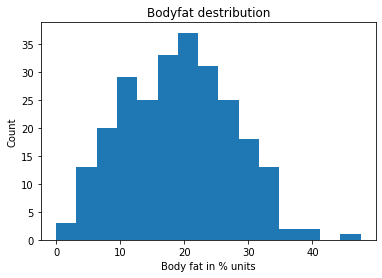

In [7]:
plt.hist(df['bodyfat'], bins=15)
plt.title("Bodyfat destribution")
plt.xlabel("Body fat in % units")
plt.ylabel('Count')

<b>Note :</b><i>As we can see, the values are normally distributed. There are no outliers that could negatively affect our model. It's a good sign.</i>

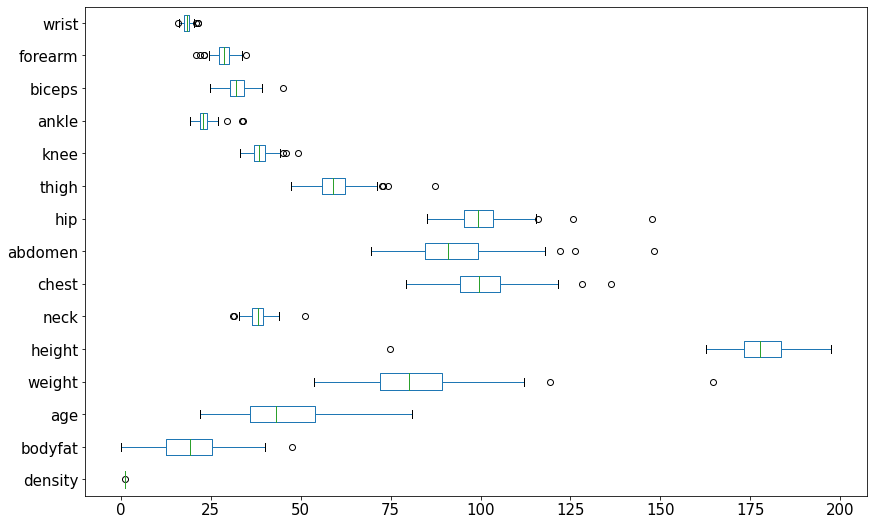

In [8]:
# Let's create boxplot to have the breaf understanding about our outliers
plt.figure(figsize=(14, 9))
boxplot = df.boxplot(vert=False, fontsize=15, grid=False)

<b>Note: </b><i>As we can see that some of the variables have outliers. It could negatively affect our prediction later on. So, if the result will be very bad in the end, then we could spend some time eliminating that noise.</i>

In [9]:
# It's time to look at correlation among variables
corr_result = df.corr()
print(corr_result)

          density   bodyfat       age    weight    height      neck     chest  \
density  1.000000 -0.987782 -0.277637 -0.594032  0.097788 -0.472966 -0.682599   
bodyfat -0.987782  1.000000  0.291458  0.612378 -0.089409  0.490592  0.702620   
age     -0.277637  0.291458  1.000000 -0.012704 -0.171839  0.113505  0.176450   
weight  -0.594032  0.612378 -0.012704  1.000000  0.308206  0.830636  0.894165   
height   0.097788 -0.089409 -0.171839  0.308206  1.000000  0.253436  0.134952   
neck    -0.472966  0.490592  0.113505  0.830636  0.253436  1.000000  0.784835   
chest   -0.682599  0.702620  0.176450  0.894165  0.134952  0.784835  1.000000   
abdomen -0.798955  0.813432  0.230409  0.888038  0.087865  0.754077  0.915828   
hip     -0.609331  0.625201 -0.050332  0.940960  0.170419  0.734958  0.829420   
thigh   -0.553091  0.559608 -0.200096  0.868671  0.148381  0.695697  0.729859   
knee    -0.495040  0.508665  0.017516  0.853231  0.286161  0.672405  0.719496   
ankle   -0.264890  0.265970 

In [10]:
corr_result['bodyfat'].sort_values()

density   -0.987782
height    -0.089409
ankle      0.265970
age        0.291458
wrist      0.346575
forearm    0.361387
neck       0.490592
biceps     0.493271
knee       0.508665
thigh      0.559608
weight     0.612378
hip        0.625201
chest      0.702620
abdomen    0.813432
bodyfat    1.000000
Name: bodyfat, dtype: float64

<b>Note: </b><i>So, from our Pearson's correlation coefficient we can make a few points. One of them is, there are positive and negative correlations to the response variable. Another one is, we will use a few different models with a different approach. One of the approaches will be using only one response and one explanatory variable. Another approach will involve using mixed of the most correlated variables. Finally, the last approach will be the use of all the variables as the base to compare the difference.</i>

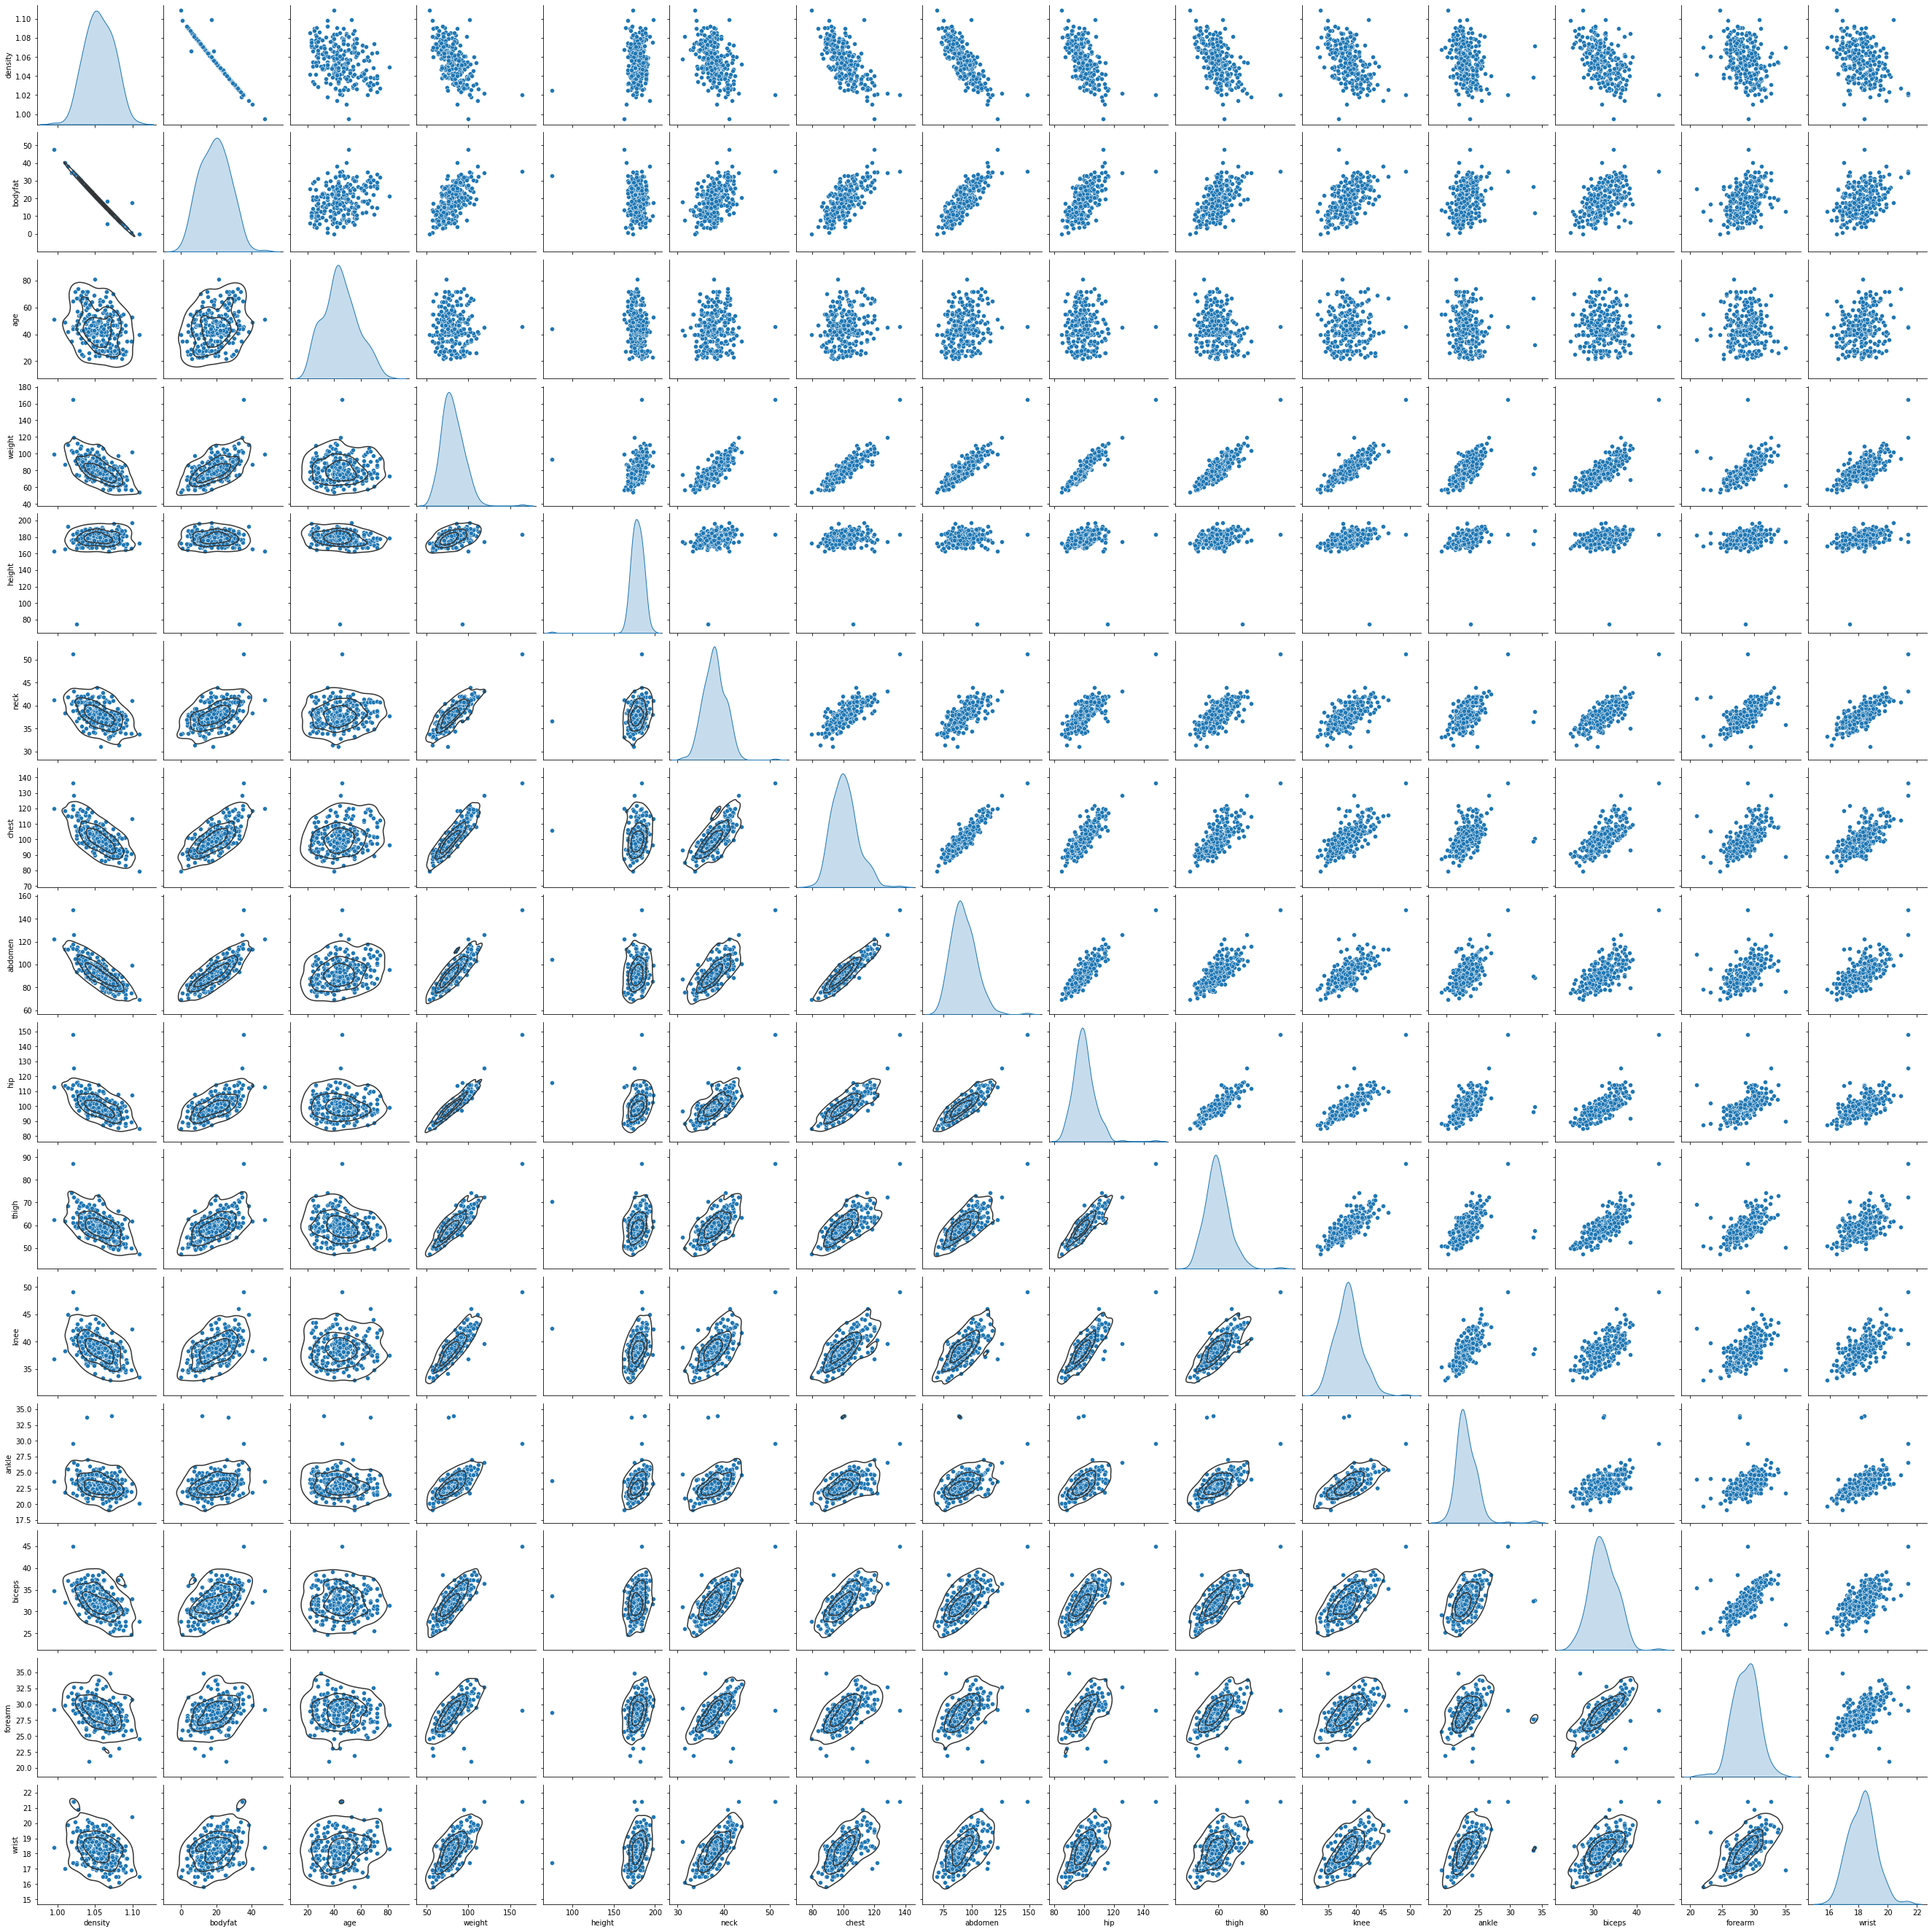

In [11]:
# Let's see grafically that correlation via pairplot graph
g = sns.pairplot(df, diag_kind='kde')
g.map_lower(sns.kdeplot, levels=4, color='.2')

<AxesSubplot:>

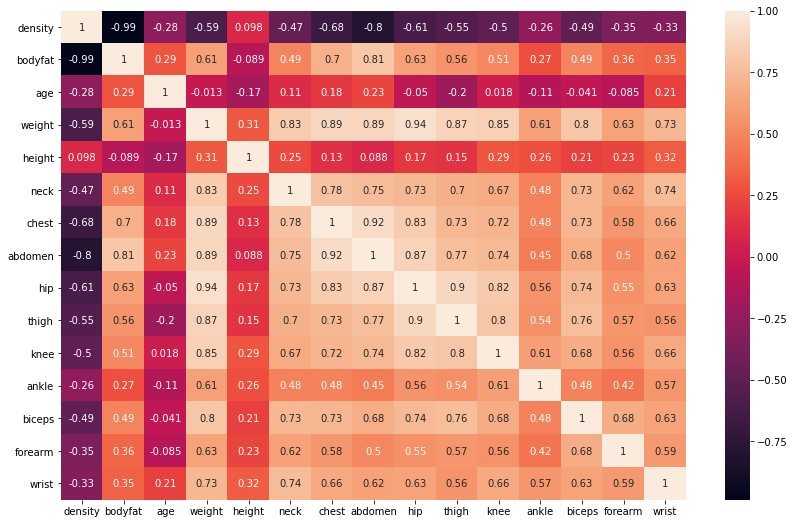

In [12]:
# Let's also explore the hitmap
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='density', ylabel='bodyfat'>

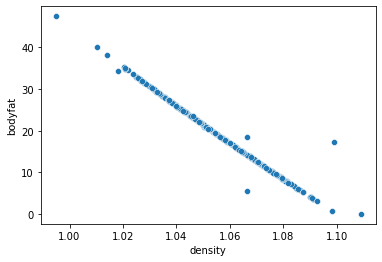

In [13]:
# Our first model will be bodyfat VS abdomen or bodyfat VS density. Let's take a closer look at them.
sns.scatterplot(x='density', y='bodyfat', data=df)

<AxesSubplot:xlabel='density', ylabel='bodyfat'>

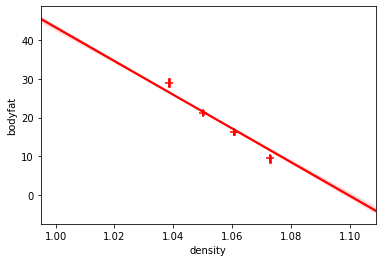

In [14]:
sns.regplot(x='density', y='bodyfat', data=df, color='red', marker='+', x_bins=4)

<b>Note: </b><i>As we can see here, there is a strong negative correlation between our response and explanatory variables.</i>

<AxesSubplot:xlabel='abdomen', ylabel='bodyfat'>

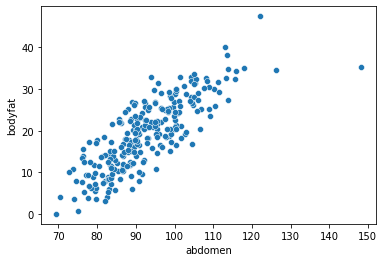

In [15]:
# Let's take a look at bodyfat VS density
sns.scatterplot(x='abdomen', y='bodyfat', data=df)

<AxesSubplot:xlabel='abdomen', ylabel='bodyfat'>

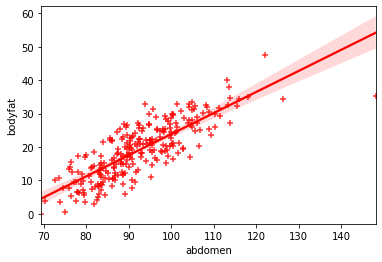

In [16]:
sns.regplot(x='abdomen', y='bodyfat', data=df, color='red', marker='+')

<b>Note: </b><i>It's also a strong positive correlation, but not as strong as bodyfat VS density.</i>

<h2>Summary</h2>
<p>So, during our EDA we were able to explore our data visually. Also, we were able to identify our response variable and think about our future approaches for the modeling part. Thanks to intuitive graphical packages we were able to identify the strong correlation among features. It will help us, in the long run, to adapt our prediction to its highest point. </p>